In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/raw.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [14]:
numeric_features = [i for i in df.columns if df[i].dtype != "O"]
categorical_features = [j for j in df.columns if df[j].dtype == "O"]

print(f"we have {len(numeric_features)} numerical features : {numeric_features}")
print(f"we have {len(categorical_features)} categorical features : {categorical_features}")

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']
df['average_score'] = df['total_score'] / 3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
maths_full = df[df['math_score'] == 100]['math_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()

print(f"Number of students with full marks in reading : {reading_full}")
print(f"Number of students with full marks in writing : {writing_full}")
print(f"Number of students with full marks in maths : {maths_full}")

Number of students with full marks in reading : 17
Number of students with full marks in writing : 14
Number of students with full marks in maths : 7


In [23]:
reading_full = df[df['reading_score'] <= 20]['reading_score'].count()
maths_full = df[df['math_score'] <= 20]['math_score'].count()
writing_full = df[df['writing_score'] <= 20]['writing_score'].count()

print(f"Number of students with less marks in reading : {reading_full}")
print(f"Number of students with less marks in writing : {writing_full}")
print(f"Number of students with less marks in maths : {maths_full}")

Number of students with less marks in reading : 1
Number of students with less marks in writing : 3
Number of students with less marks in maths : 4


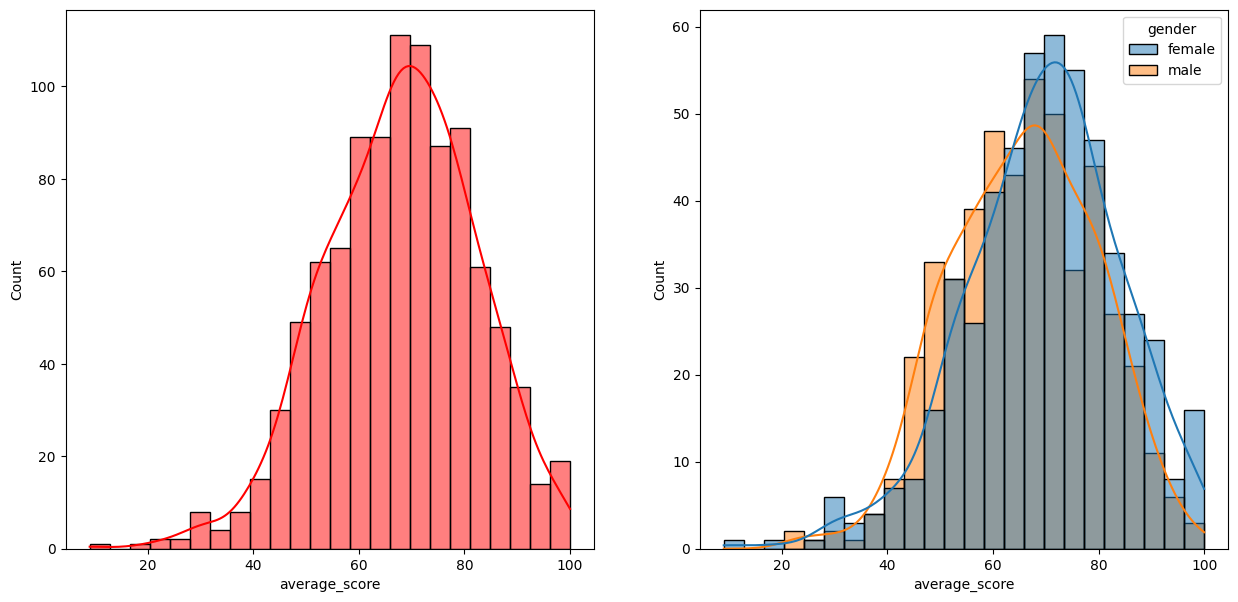

In [24]:
fig , axs = plt.subplots(1 ,2 , figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df , x = 'average_score' , kde = True , color='r')
plt.subplot(122)
sns.histplot(data = df , x='average_score' , kde=True , hue='gender')
plt.show()

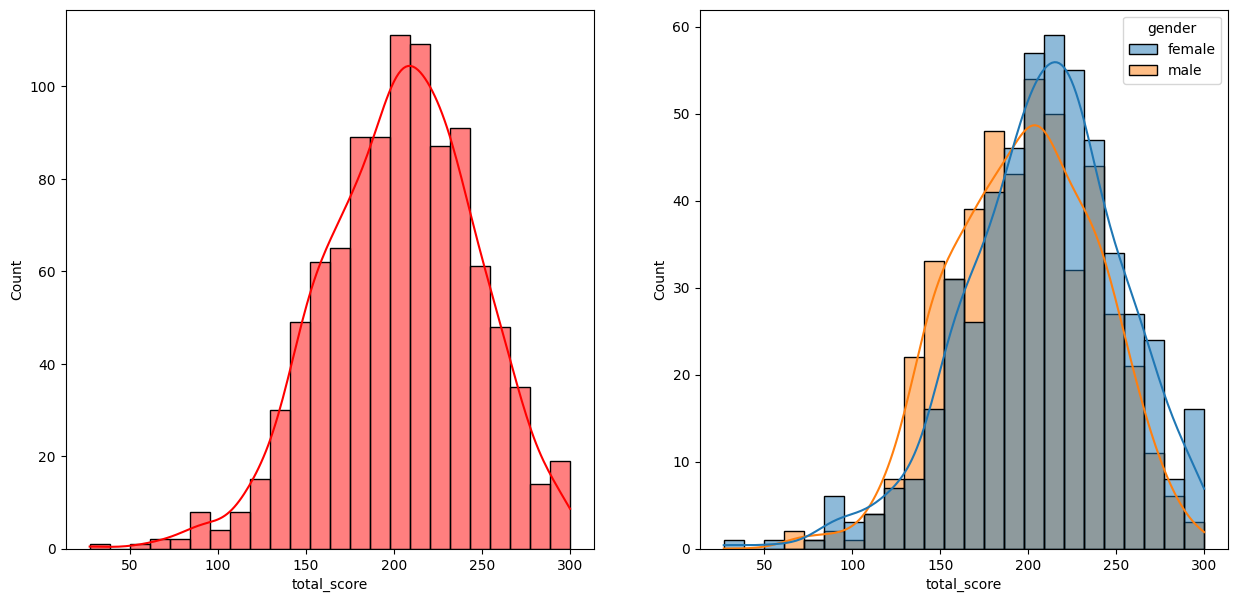

In [25]:
fig , axs = plt.subplots(1 ,2 , figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df , x = 'total_score' , kde = True , color='r')
plt.subplot(122)
sns.histplot(data = df , x='total_score' , kde=True , hue='gender')
plt.show()

#Female performes better than males

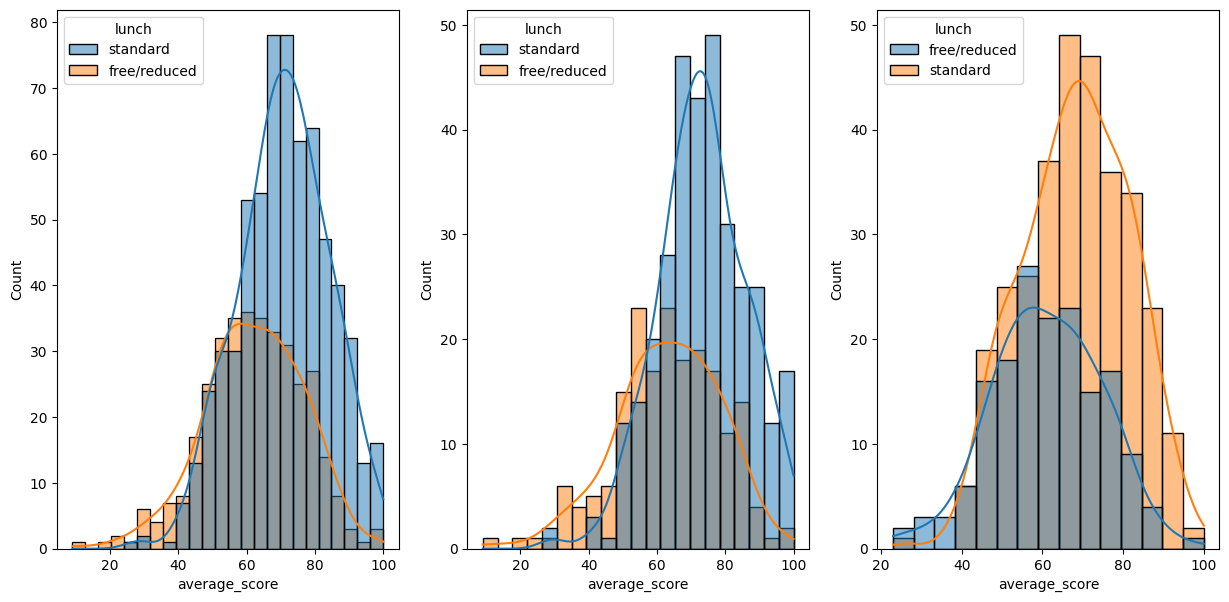

In [26]:
fig , axs = plt.subplots(1 ,3 , figsize = (15,7))
plt.subplot(131)
sns.histplot(data = df , x = 'average_score' , kde = True , hue= 'lunch')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'] , x='average_score' , kde=True , hue='lunch')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'] , x='average_score' , kde=True , hue='lunch')
plt.show()